In [2]:

import pickle
dbfile = open('/home/hadarla/Projects/brainscore-language-fork/brainscore-language/brainscore_language/benchmarks/t17speech2024/distilgpt2-t17speech2024_28Sep2024.pkl', 'rb')
db = pickle.load(dbfile)
for keys in db:
    print(keys, '=>', db[keys])
dbfile.close()

/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


model => <brainscore_language.model_helpers.huggingface.HuggingfaceSubject object at 0x74b708bd7340>
benchmark => <brainscore_language.benchmarks.t17speech2024.benchmark.T17speech2024Linear object at 0x74b63710f6a0>
layer_scores => <xarray.Score (layer: 6)>
array([0.27868836, 0.27800812, 0.27492061, 0.27484869, 0.27536809,
       0.27572062])
Coordinates:
  * layer    (layer) <U20 'transformer.h.0.ln_1' ... 'transformer.h.5.ln_1'
Attributes:
    raw:      <xarray.Score (layer: 1, split: 10, neuroid: 512)>\narray([[[0....
layer_score => <xarray.Score (layer: 1)>
array([0.27572062])
Coordinates:
  * layer    (layer) <U20 'transformer.h.5.ln_1'
Attributes:
    raw:      <xarray.Score (layer: 1, split: 10, neuroid: 512)>\narray([[[0....
layer_scores_backup => [<xarray.Score (layer: 1)>
array([0.27868836])
Coordinates:
  * layer    (layer) <U20 'transformer.h.0.ln_1'
Attributes:
    raw:      <xarray.Score (layer: 1, split: 10, neuroid: 512)>\narray([[[0...., <xarray.Score (layer: 1)>
array

In [ ]:
import numpy as np
electrode_mapping = np.arange(0,512)

In [6]:
from tqdm import tqdm
layer_names = []
for layer in tqdm([f'transformer.h.{block}.ln_1' for block in range(6)], desc='layers'):
    layer_names.append(layer)

print(layer_names)



layers: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 256794.12it/s]

['transformer.h.0.ln_1', 'transformer.h.1.ln_1', 'transformer.h.2.ln_1', 'transformer.h.3.ln_1', 'transformer.h.4.ln_1', 'transformer.h.5.ln_1']


In [36]:
layer_scores_per_neuroid = []
layer_scores_per_neuroid_reordered = []
for layer_ind in range(6):
    data = db['layer_scores_backup'][layer_ind].raw.mean('split').data
    data = data.reshape(512,1)
    data_reordered = data[electrode_mapping]
    print(np.shape(data))
    layer_scores_per_neuroid.append(data)
    layer_scores_per_neuroid_reordered.append(data_reordered)

(512, 1)
(512, 1)
(512, 1)
(512, 1)
(512, 1)
(512, 1)


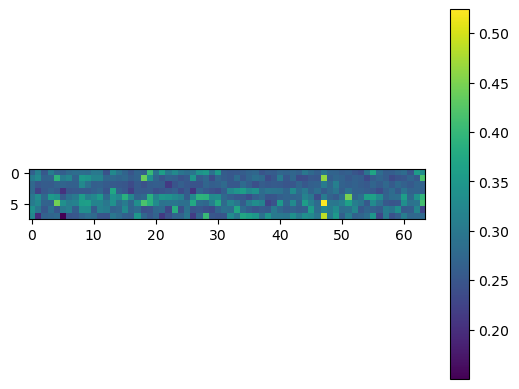

In [39]:
import matplotlib.pyplot as plt
plt.imshow(layer_scores_per_neuroid_reordered[2].reshape(8,64))
plt.colorbar()
plt.show()

In [45]:

layer_scores_per_neuroid_reordered_reshaped = []
for layer in range(6):
    arr_all = []
    for array_index in range(4):
        arr = layer_scores_per_neuroid_reordered[layer][array_index*64:(array_index+1)*64]
        arr_all.append(arr.reshape(64,1))
    layer_scores_per_neuroid_reordered_reshaped.append(arr_all)

layer_scores_per_neuroid_reordered_reshaped = np.squeeze(layer_scores_per_neuroid_reordered_reshaped)

array_pos = ["6v-1", "6v-2", "55b-1", "55b-2"]
layer_scores_per_array = xr.DataArray(layer_scores_per_neuroid_reordered_reshaped,
                                      coords = [layer_names, array_pos, range(64)], dims = ["layers", "array", "neuroid"])

means = layer_scores_per_array.mean('neuroid')
stds = layer_scores_per_array.std('neuroid')

# fig, ax = plt.subplots(figsize=(10, 10))
# for array_ind in range(4):
#     plot_score_vs_layer(means[:,array_ind], stds[:,array_ind])
# plt.legend(array_pos)
# plt.show()
#fig.show()

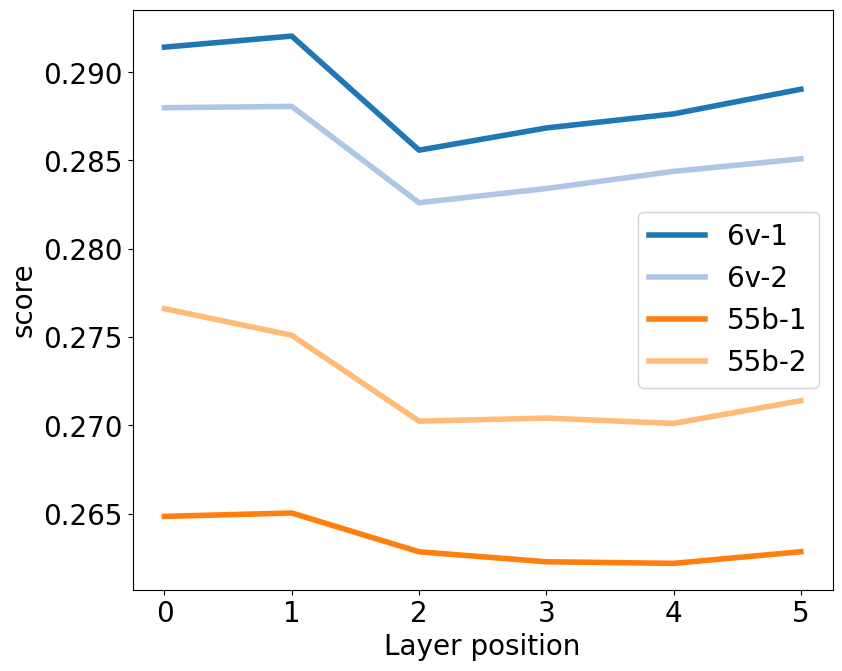

In [70]:
#import xarray as xr


fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

for array_ind in range(4):

    x = np.arange(6)
    ax.plot(x,means[:,array_ind],linewidth=4)
    fig.subplots_adjust(bottom=0.3, left=0.2)
    #ax.set_xticklabels(layer_names, rotation=45, ha='right')
    ax.set_ylabel('score')

x = np.arange(0,6)
plt.xticks(x)
plt.rcParams.update({'font.size': 20})
plt.xlabel('Layer position')

plt.legend(array_pos,loc=7)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_meanLayerScore_allArrays.svg') #, bbox_inches='tight')


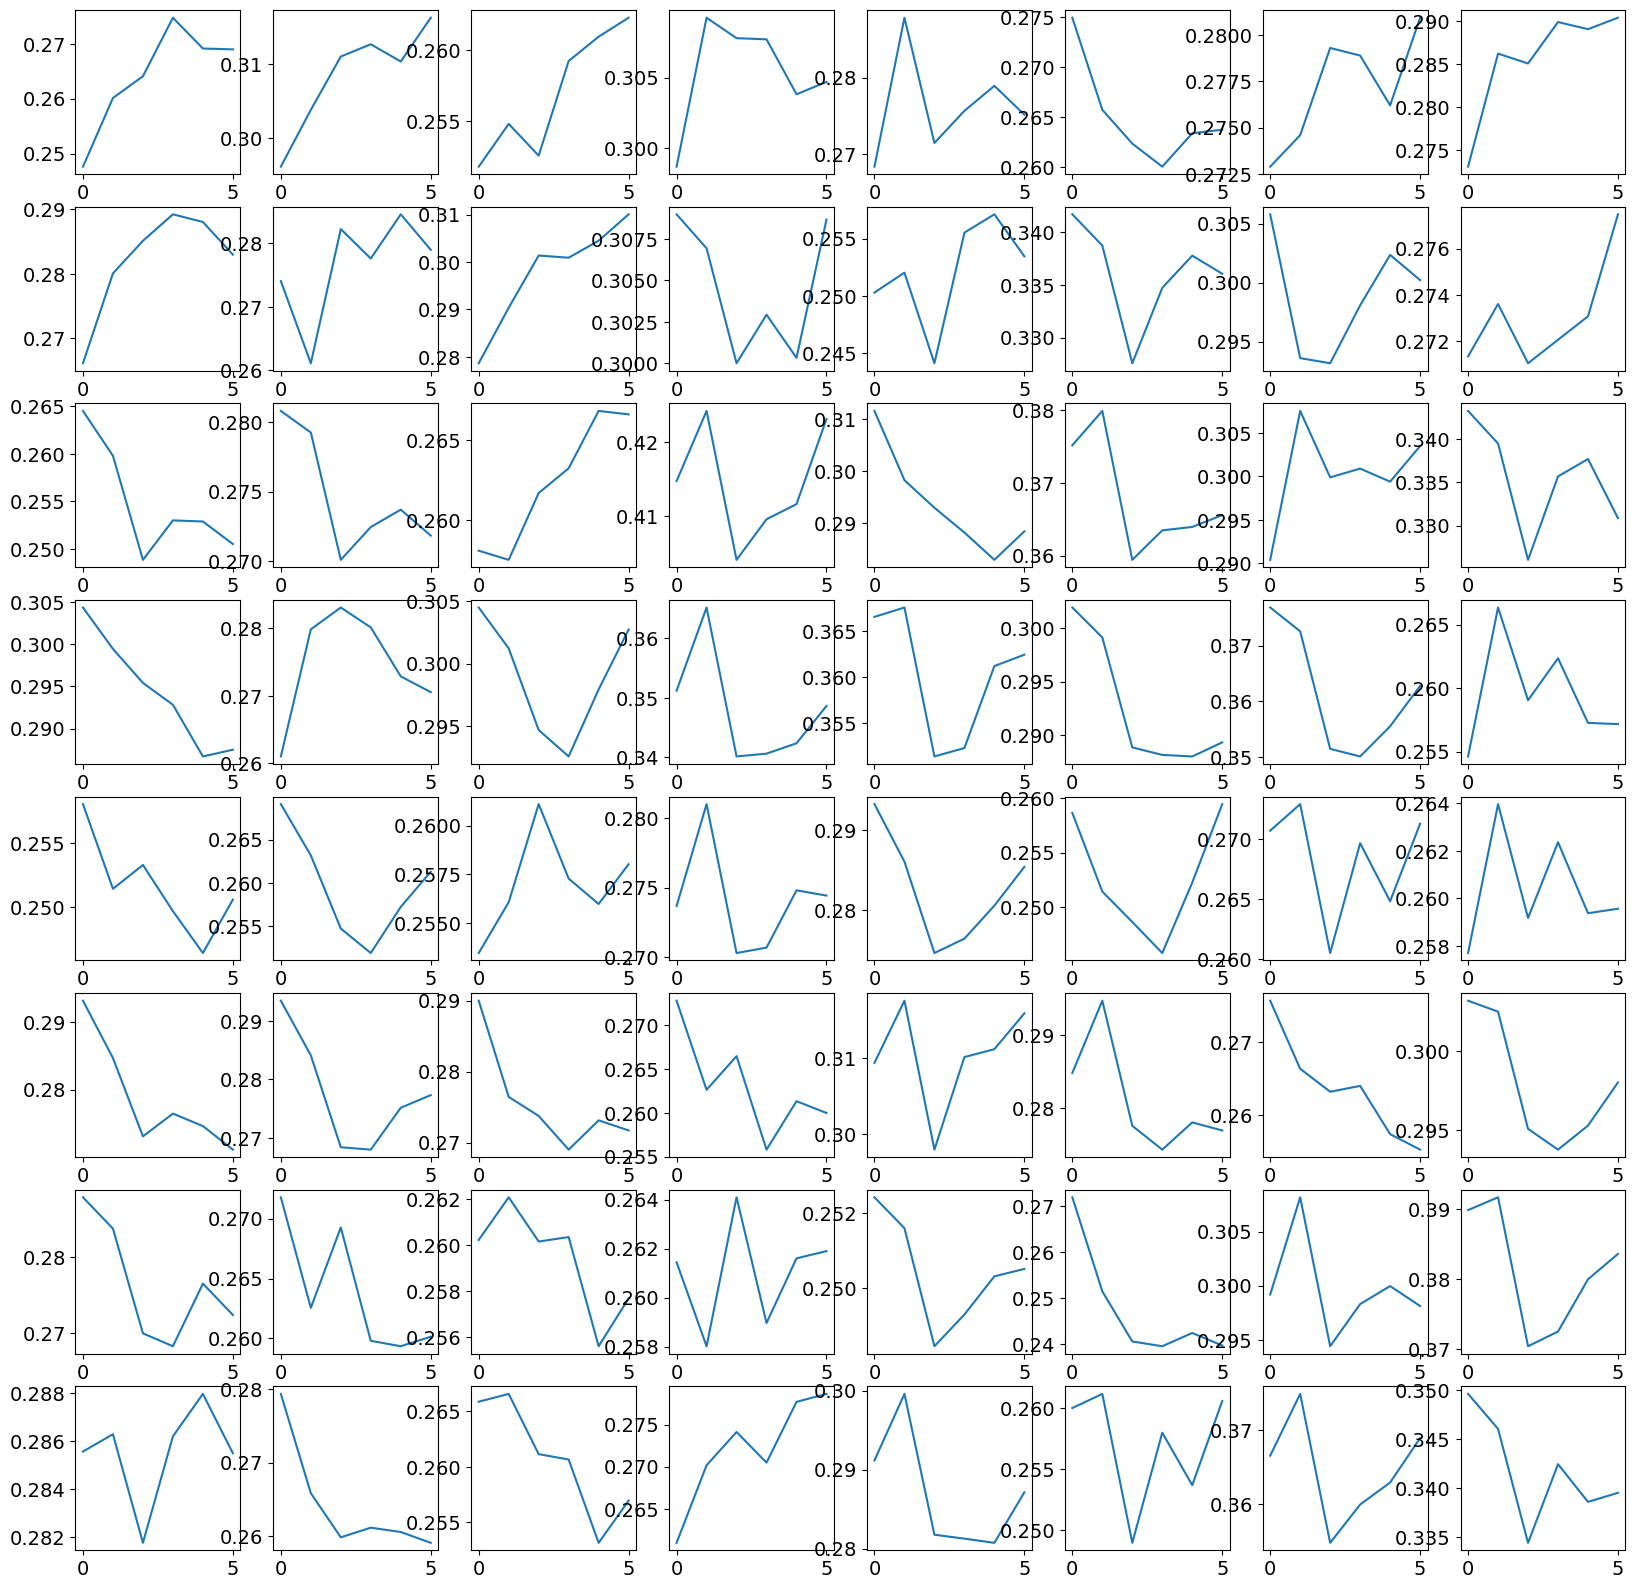

In [86]:
fig, axs = plt.subplots(8,8,figsize=(20, 20))

x = np.arange(6)
for array_ind in range(4):
    for neuroid_ind in range(64):   #= 13
        layer_scores_single_neuroid = []
        #layer_scores_per_neuroid_reordered_reshaped = []
        for layer in range(6):
            neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
            layer_scores_single_neuroid.append(neuroid_score_layer)
    
        subfig_ind = np.unravel_index(neuroid_ind, [8, 8])
        # axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
        axs[subfig_ind].plot(layer_scores_single_neuroid)
        #axs[subfig_ind].tick_params(axis='both', labelsize=10)
    
    
        #plt.plot(layer_scores_single_neuroid)
    
    plt.rcParams.update({'font.size': 14})
    plt.show()



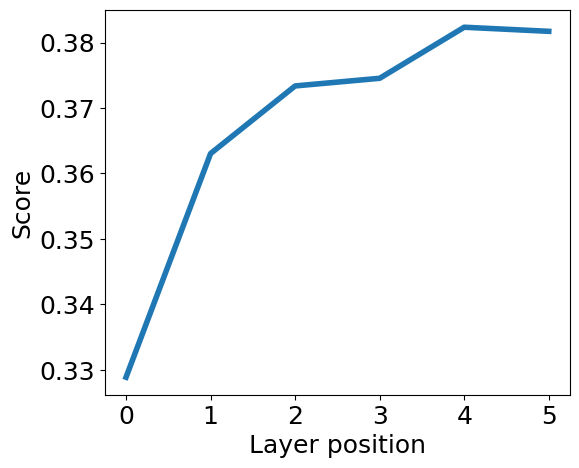

In [81]:
plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1,1,figsize=(6, 5))

array_ind = 3
neuroid_ind = 13
layer_scores_single_neuroid = []
for layer in range(6):
    neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
    layer_scores_single_neuroid.append(neuroid_score_layer)

# axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
plt.plot(layer_scores_single_neuroid,linewidth=4)
#axs[subfig_ind].tick_params(axis='both', labelsize=10)
plt.xlabel('Layer position')
plt.ylabel('Score')

#figure(figsize=(8, 6), dpi=80)

plt.show()

fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_array55b-2-neuroid13.svg',bbox_inches='tight') #, bbox_inches='tight')


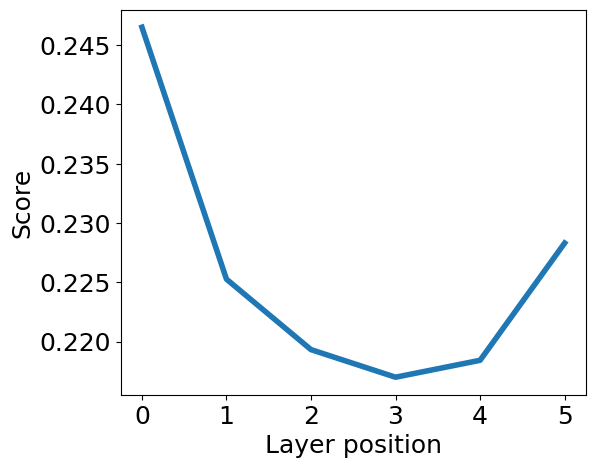

In [82]:
plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1,1,figsize=(6, 5))

array_ind = 3
neuroid_ind = 16
layer_scores_single_neuroid = []
for layer in range(6):
    neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
    layer_scores_single_neuroid.append(neuroid_score_layer)

# axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
plt.plot(layer_scores_single_neuroid,linewidth=4)
#axs[subfig_ind].tick_params(axis='both', labelsize=10)
plt.xlabel('Layer position')
plt.ylabel('Score')


#figure(figsize=(8, 6), dpi=80)

plt.show()

fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_array55b-2-neuroid16.svg',bbox_inches='tight') #, bbox_inches='tight')

In [ ]:
layer_scores_ordered = []
for layer in layer_names:
    layer_scores_ordered.append(layer_scores.sel(layer=layer).data)

layer_scores_std_ordered = []
for layer in layer_names:
    layer_scores_std_ordered.append(np.std(layer_scores.sel(layer=layer).raw.mean('neuroid')).data)

print(layer_scores_ordered)
print(layer_scores_std_ordered)